In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

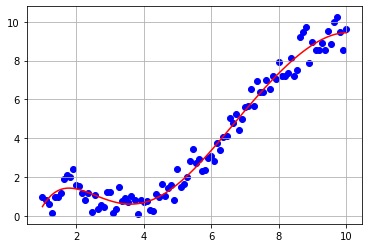

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

scale=StandardScaler()
x=scale.fit_transform(data_x)
poly=PolynomialFeatures(degree=6)
x_polynom =poly.fit_transform(x)
poly.fit(x_polynom,data_y)
l = LinearRegression()
l.fit(x_polynom,data_y)
y_pred = l.predict(x_polynom)

plt.grid()
plt.scatter(data_x,data_y,color='b')
plt.plot(data_x,y_pred,color='r')



In [63]:
data_y.shape

(100, 1)

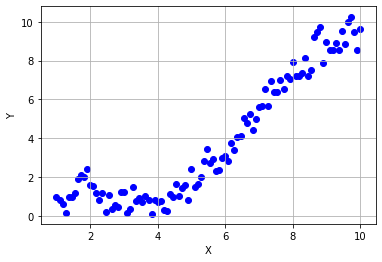

In [64]:
plt.scatter(data_x,data_y,c="b",label="train set")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [65]:
order=np.random.permutation(len(data_x))
order

array([76, 62, 65, 21, 91,  4, 30, 12, 37, 54, 27, 81, 35, 38, 13, 93, 49,
       90, 26,  5, 55, 60, 50, 98, 58, 75, 67, 88, 61, 89, 20, 69, 11, 59,
       33, 53, 44, 52, 32, 70, 10, 99, 22, 39, 68, 45, 56, 71,  6, 40,  8,
       48, 86, 17, 25, 14, 42, 19, 82,  9, 28, 18, 97, 84, 92,  2, 94, 41,
       79,  1, 73, 23, 72, 15, 66, 87, 46,  7, 34, 95, 24, 83,  3, 16, 36,
       47, 85,  0, 96, 43, 77, 80, 51, 74, 57, 29, 78, 31, 64, 63])

In [66]:
model_order = 7
data_x1 = np.power(data_x, range(model_order)) 
data_x1 /= np.max(data_x1, axis=0)

In [67]:
data_x1.shape

(100, 7)

In [68]:
portion=20
train_x=data_x1[order[portion:]]
train_y=data_y[order[portion:]]

test_x=data_x[order[:portion]]
test_y=data_y[order[:portion]]

In [ ]:
# fit a polynomial of order 6

In [69]:
train_x.shape

(80, 7)

In [70]:
theta1 = np.random.random(7).reshape(7,1)

In [71]:
# Implement gradient computation and theta update 
m=80

def gradient_descent(X, y, theta, alpha):
    for t in range(1000):
        theta= theta - alpha * (1/m) * (X.T @ ((X@ theta) - y))
    return theta

    
    

In [72]:
train_x.shape

(80, 7)

In [73]:
train_y.shape

(80, 1)

In [74]:
theta1.shape

(7, 1)

In [75]:
theta2 =gradient_descent(train_x,train_y,theta1,0.01)

In [76]:
theta2

array([[0.69425294],
       [1.57966562],
       [2.07666965],
       [2.34831211],
       [1.48110148],
       [1.80146685],
       [1.58784944]])

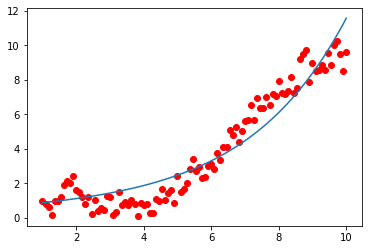

In [77]:
plt.scatter(data_x,data_y,color="red")
plt.plot(data_x,data_x1@theta2)

In [78]:
X=train_x.T
X.shape[0]

7

In [79]:
theta=np.zeros(7).reshape(7,1)
theta.shape

(7, 1)

In [84]:
# Call stochastic gradient descent in the main loop
m,n = train_x.shape
LR = 0.01
sample_size = 30
epochs = 1000
costs = []
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_sample=train_x[idx]
    y_sample=train_y[idx]
    yhat = x_sample @ theta - y_sample
    grad = (1/m) * x_sample.T @ ((x_sample@ theta) -y_sample)
    theta -= LR * grad
    

    

In [85]:
x_sample.shape

(30, 7)

In [86]:
theta

array([[0.95549784],
       [1.86618088],
       [1.93535856],
       [1.78223551],
       [1.58349465],
       [1.39303461],
       [1.22564868]])

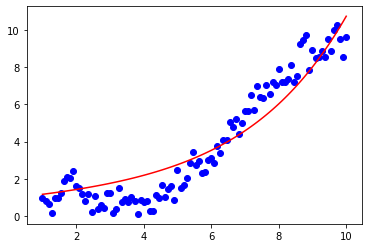

In [87]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
plt.scatter(data_x,data_y,color="blue")
plt.plot(data_x,data_x1@theta,color="red")
# plot x vs y_hat in red